# Mina Ilkhani 
# 610398191 
# image processing HW-2

defining the path of the images:

In [2]:
circlesPath = 'images/circles.jpg'
holesPath = 'images/holes.jpg'
img1Path = 'images/image1.jpg'
img2Path = 'images/image2.jpg'
img3Path = 'images/image3.jpg'
img4Path = 'images/image4.jpg'
img5Path = 'images/image5.jpg'
img6Path = 'images/image6.jpg'

defining a function for plotting the images and comparing:

In [3]:
import matplotlib.pyplot as plt

def display_2_images(img1, descpriptionImg1:str, img2, descpriptionImg2:str, cmap = 'viridis'):
    _, axes = plt.subplots(ncols=2, )
    ax1, ax2 = axes.ravel()

    ax1.imshow(img1, cmap = cmap)
    ax1.set_title(descpriptionImg1)

    ax2.imshow(img2,cmap = cmap)
    ax2.set_title(descpriptionImg2)


In [4]:
import cv2
import numpy as np

# 1)Filtering in Spatial Domain:

### Average(Mean) filter:
As we want to calculate a simple mean(not wighted mean) we have a 5*5 matrix. All elements of this kernal are $\frac{1}{5*5}$

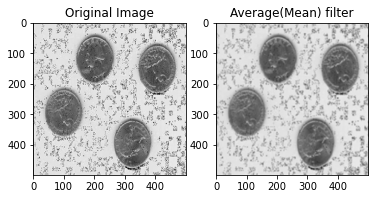

In [5]:
img1 = cv2.imread(img1Path)

kernel = np.ones((5, 5), np.float32) / 25

output = np.zeros(img1.shape, np.uint8)
for i in range(3):
    output[:,:,i] = cv2.filter2D(img1[:,:,i], -1, kernel)

display_2_images(img1,'Original Image', output,'Average(Mean) filter' )


### Median filter:
for this part medianBlur is avilable in cv2

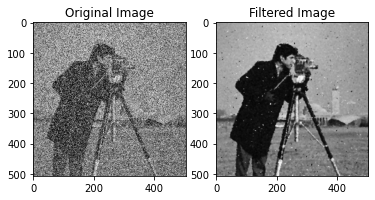

In [6]:
img2 = cv2.imread(img2Path)

output = cv2.medianBlur(img2, 5)

display_2_images(img2,'Original Image', output,'Filtered Image' )

### Laplacian filter:
*ksize* is the size of kernel \
Lalpacian filter is also avilable in cv2: \
laplacian filter is applied to grayscale images so I converted the 3-channel image to a grayscale image

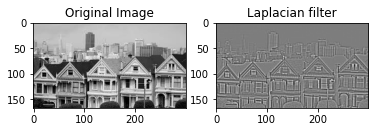

In [7]:
img3 = cv2.imread(img3Path)

gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(gray,cv2.CV_64F, ksize=5)
display_2_images(gray,'Original Image', laplacian,'Laplacian filter', 'gray' )


### Sobel(X and Y) filter:
Agine first we have to convert the image to grayscale. Then, I applied Sobel operator in the x-direction with 1 for the dx parameter and 0 for the dy parameter, and in the y-direction using cv2.Sobel() with 0 for dx and 1 for dy. Then, I combined both Sobel filters. \
different ksize in range 3 and 11 didn't make any meaningful change


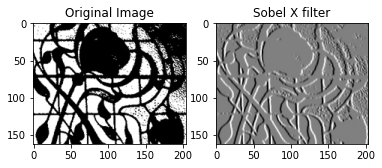

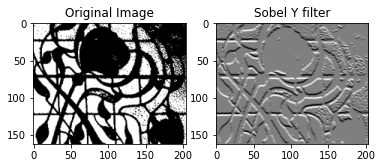

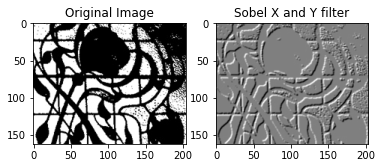

In [8]:
img4 = cv2.imread(img4Path)

gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)  # x
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)  # y

sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)


display_2_images(gray,'Original Image', sobelx,'Sobel X filter', 'gray' )
display_2_images(gray,'Original Image', sobely,'Sobel Y filter', 'gray' )
display_2_images(gray,'Original Image', sobelxy,'Sobel X and Y filter', 'gray' )


### 2)Filtering in Frequency Domain:

### a)

/tmp/ipykernel_7706/2894764889.py:11: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_centered = 20*np.log(np.abs(fshift))
/tmp/ipykernel_7706/2894764889.py:21: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_decentralized = 20*np.log(np.abs(fshift_decentralized))


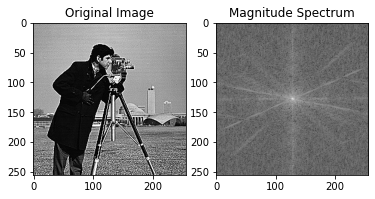

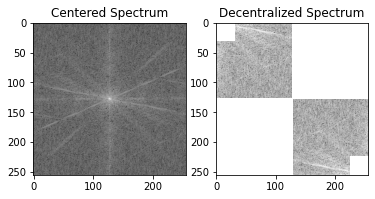

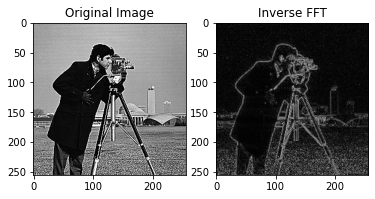

In [23]:
img5 = cv2.imread(img5Path, 0)

f = np.fft.fft2(img5)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
display_2_images(img5,'Original Image', magnitude_spectrum,'Magnitude Spectrum', 'gray' )


rows, cols = img5.shape
fshift[(rows//2)-30:(cols//2)+30, (cols//2)-30:(cols//2)+30] = 0
magnitude_spectrum_centered = 20*np.log(np.abs(fshift))


fshift_centered = np.fft.fftshift(f)
fshift_decentralized = np.zeros_like(fshift)
fshift_decentralized[:rows//2, :cols//2] = fshift[rows//2:, cols//2:]
fshift_decentralized[rows//2:, cols//2:] = fshift[:rows//2, :cols//2]
img_back = np.fft.ifft2(fshift)
img_back = np.abs(img_back)
magnitude_spectrum_centered = 20*np.log(np.abs(fshift_centered))
magnitude_spectrum_decentralized = 20*np.log(np.abs(fshift_decentralized))
display_2_images(magnitude_spectrum_centered,'Centered Spectrum', magnitude_spectrum_decentralized,'Decentralized Spectrum', 'gray' )


# plt.imshow(img_back, cmap = 'gray')
# plt.title('Inverse FFT'), plt.xticks([]), plt.yticks([])
# plt.show()
display_2_images(img5,'Original Image', img_back,'Inverse FFT', 'gray' )

### b)

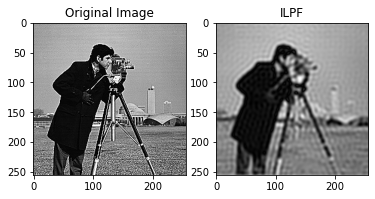

In [27]:
rows, cols = img5.shape

f = np.fft.fft2(img5)
fshift = np.fft.fftshift(f)

mask_ILPF = np.zeros((rows, cols), np.uint8)
center = (rows // 2, cols // 2)
cv2.circle(mask_ILPF, center, 30, (255, 255, 255), -1)

fshift_filtered_ILPF = fshift * mask_ILPF

f_ishift_ILPF = np.fft.ifftshift(fshift_filtered_ILPF)
img_back_ILPF = np.fft.ifft2(f_ishift_ILPF)
img_back_ILPF = np.abs(img_back_ILPF)

display_2_images(img5,'Original Image', img_back_ILPF,'ILPF', 'gray' )


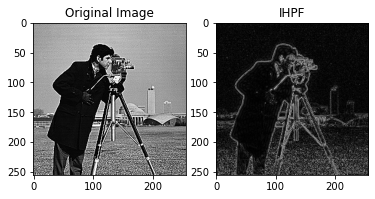

In [28]:


mask_IHPF = np.ones((rows, cols), np.uint8)
cv2.circle(mask_IHPF, center, 30, (0, 0, 0), -1)

fshift_filtered_IHPF = fshift * mask_IHPF

f_ishift_IHPF = np.fft.ifftshift(fshift_filtered_IHPF)
img_back_IHPF = np.fft.ifft2(f_ishift_IHPF)
img_back_IHPF = np.abs(img_back_IHPF)

display_2_images(img5,'Original Image', img_back_IHPF,'IHPF', 'gray' )



### c)

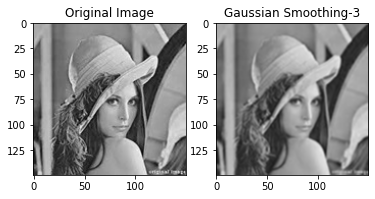

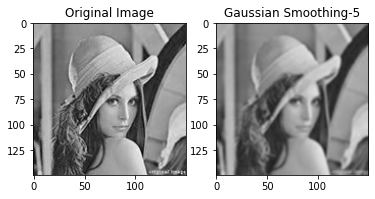

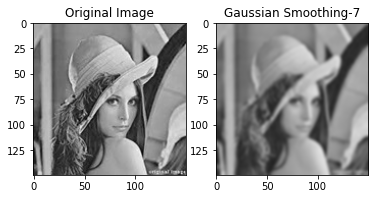

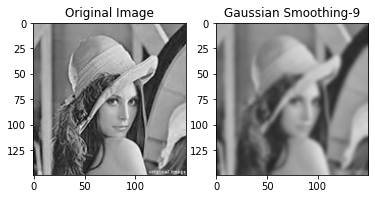

In [10]:
import cv2

# Load the image
img6 = cv2.imread(img6Path)

# Apply Gaussian smoothing with different kernel sizes
gauss3 = cv2.GaussianBlur(img6, (3, 3), 0)
gauss5 = cv2.GaussianBlur(img6, (5, 5), 0)
gauss7 = cv2.GaussianBlur(img6, (7, 7), 0)
gauss9 = cv2.GaussianBlur(img6, (9, 9), 0)



display_2_images(img6,'Original Image', gauss3,'Gaussian Smoothing-3', 'gray' )
display_2_images(img6,'Original Image', gauss5,'Gaussian Smoothing-5', 'gray' )
display_2_images(img6,'Original Image', gauss7,'Gaussian Smoothing-7', 'gray' )
display_2_images(img6,'Original Image', gauss9,'Gaussian Smoothing-9', 'gray' )

### 3)Morphology Operators:

In [11]:
holeImg = cv2.imread(holesPath, 0)

apply some padding:

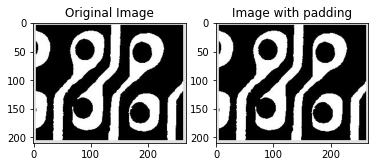

In [12]:
holeImg = cv2.copyMakeBorder(holeImg, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=225)
display_2_images(holeImg,'Original Image', holeImg,'Image with padding' , cmap='gray')


apply a binary threshold:

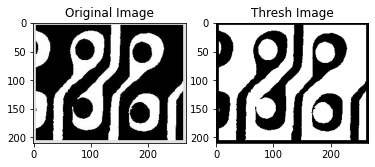

In [13]:
ret, thresh = cv2.threshold(holeImg, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display_2_images(holeImg,'Original Image', thresh,'Thresh Image' , cmap='gray')


performs opening and closing to remove small things and fill small gaps:

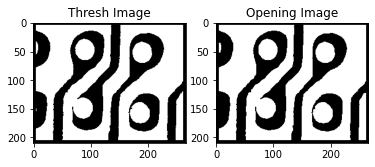

In [14]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
display_2_images(thresh,'Thresh Image', opening,'Opening Image' , cmap='gray')


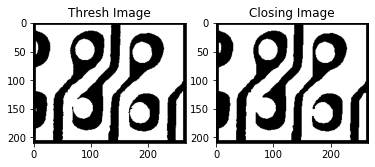

In [15]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
display_2_images(thresh,'Thresh Image', closing,'Closing Image' , cmap='gray')

using distance transform to calculate the distance between each pixel and it's nearest background pixel:

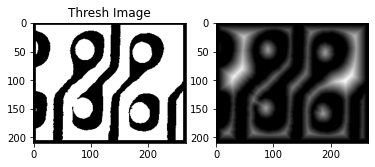

In [16]:
tra = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

display_2_images(thresh,'Thresh Image', tra,'' , cmap='gray')


identifying the sure foreground pixels:

In [17]:

_, sureForeground  = cv2.threshold(tra, 0.7 * tra.max(), 255, 0)


subtracts the sure foreground from the original binary image to get the unknown region. then, labeling the sure_foreground regions using connected component analysis and appling the watershed algorithm to segment the unknown regions:

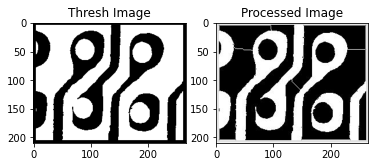

In [18]:
unknown = cv2.subtract(opening, np.uint8(sureForeground))
_, markers = cv2.connectedComponents(np.uint8(sureForeground)) 
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(cv2.cvtColor(holeImg, cv2.COLOR_GRAY2BGR), markers)
holeImg[markers == -1] = 255

display_2_images(thresh,'Thresh Image', holeImg,'Processed Image' , cmap='gray')


then, counting the number of holes and their diameters and prints the results.

In [19]:
numHoles, counts = np.unique(markers, return_counts=True)
hole_count = len(numHoles) - 2  # removing background and padding

diameters = []
for c in counts[2:]:
    diameters.append(2*np.sqrt(c / np.pi)) 

In [29]:
print("Holes:", hole_count)
print("Diameters:", diameters)

Holes: 4
Diameters: [53.820256077730576, 73.76010150923973, 79.01071755044693, 101.0765754611569]
